In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv')

In [3]:
#todo check correlation after dtype categorical data. do the step by step.

## reorganize the columns and keep the useful ones

In [4]:
cols = list(df.columns.values)
cols

['Barragem_Nome',
 'Barragem_Altura_AcimaNivelTerreno',
 'Barragem_Capacidade',
 'Barragem_Principal_Tipo_material',
 'Barragem_Principal_comprimento',
 'Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa',
 'Barragem_FasedeVida',
 'ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?',
 'material_score',
 'risco_score',
 'DPA_score',
 'temPAE_score',
 'temPS_score',
 'maintenance_score',
 'vazao_score',
 'doc_score',
 'Eclusa_score']

In [5]:
df.drop(columns=['Barragem_Nome','Barragem_Principal_Tipo_material','Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa'], inplace=True)

In [6]:
df.drop(columns=['ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?'], inplace = True)

In [7]:
df.drop(columns=['Barragem_FasedeVida'], inplace = True)

In [9]:
#Eclusa is highly correlated with capacity. No need to keep it.
df.drop(columns=['Eclusa_score'], inplace = True)

In [24]:
#PS is highly correlated with PAE. No need to keep it.
df.drop(columns=['temPS_score'], inplace = True)

KeyError: "['temPS_score'] not found in axis"

## one-hot enconding 

In [10]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#dropped this column.
'''lb = LabelBinarizer()

fit = lb.fit_transform(df['Barragem_FasedeVida'].values)
dfOneHot = pd.DataFrame(fit, columns = ['vida_'+str(int(i)) for i in range(fit.shape[1])])
final = pd.concat([df, dfOneHot], axis=1)'''

In [ ]:
'''#drop one-hot-econding features
final.drop(columns=['Barragem_FasedeVida'], inplace=True)'''

In [25]:
df.columns

Index(['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento', 'material_score', 'risco_score',
       'DPA_score', 'temPAE_score', 'maintenance_score', 'vazao_score',
       'doc_score'],
      dtype='object')

In [ ]:
df.isnull().sum()

In [26]:
ds = df.dropna()

## Test one: 

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
var1 = ['DPA_score'] #'risco_score' keep as classification

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var1:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
var2 = ['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento']

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var2:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))
    
#dfOneHot = pd.DataFrame(fit, columns = [name+str(int(i)) for i in range(fit.shape[1])])
#mvp = pd.concat([mvp, dfOneHot], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

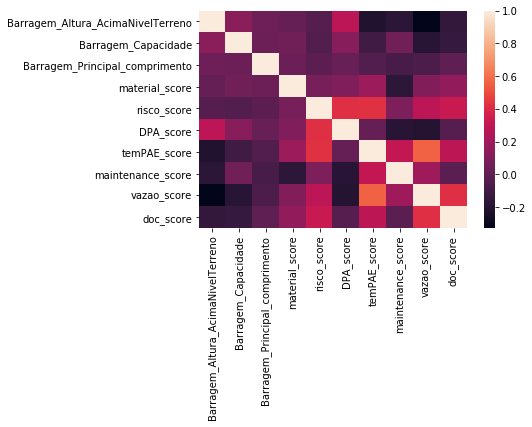

In [29]:
sns.heatmap(ds.corr()) #Eclusa and Capacty are corr. Drop eclusa and run it again.

In [30]:
y = ds['risco_score']
X = ds.drop(['risco_score'], axis = 1)

In [31]:
# divide train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [32]:
#NaN issue here
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) #sample is random, but is not that. It starts for a different order everytime for decision tree.
y_pred = dtc.predict(X_test) #this is to see the item or the dataset and predict. For example, check behaviour for outliers. 
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy for risk {round(acc, 2)}%")

Decision Tree Test Accuracy for risk 72.01%


In [ ]:
#redo everything following these steps:
#https://towardsdatascience.com/machine-learning-on-categorical-variables-3b76ffe4a7cb
#obs: how to fill nans:
#test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)

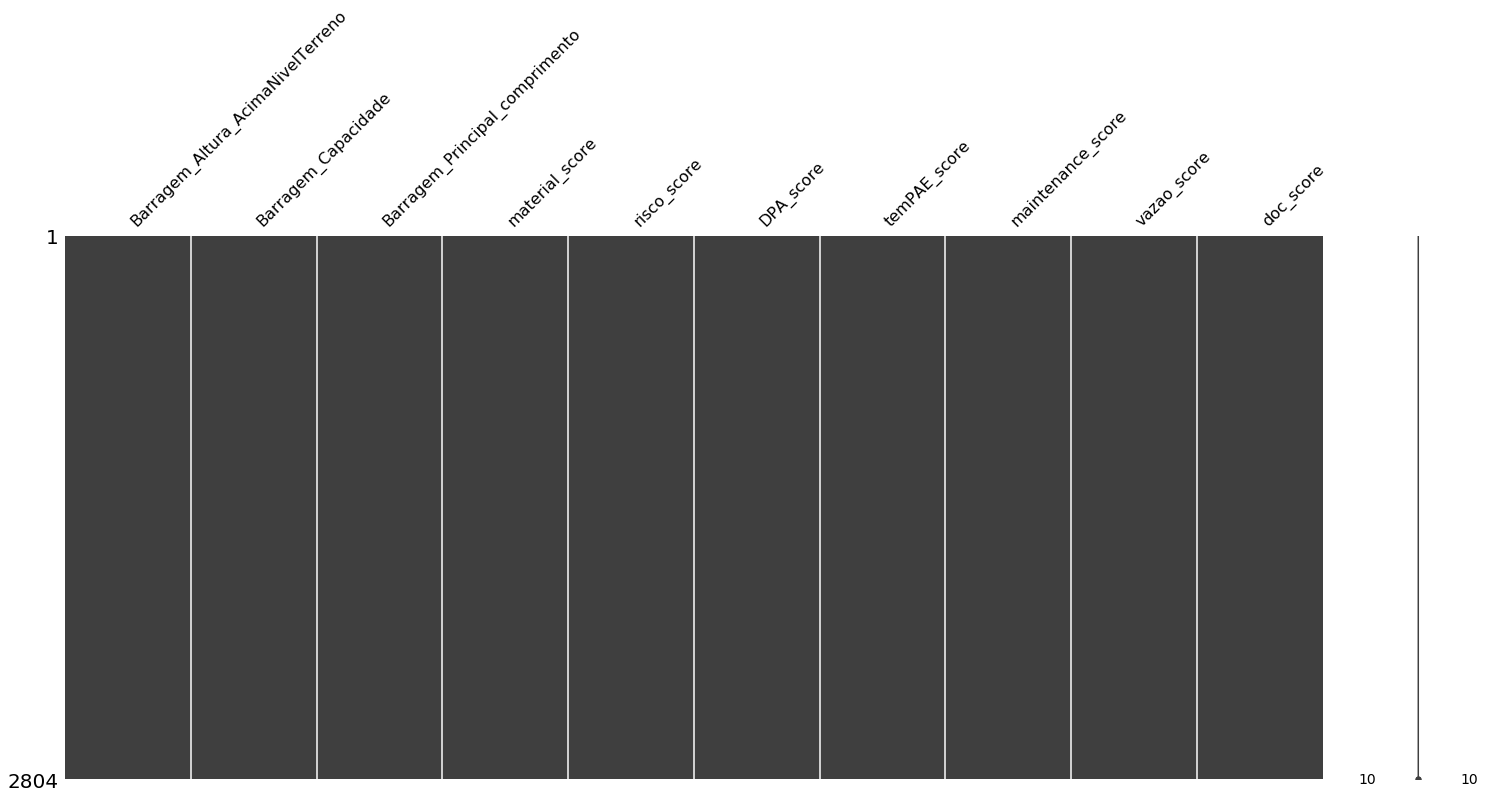

In [33]:
import missingno as msno
msno.matrix(ds)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

In [36]:
results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegression 0.7004035154283206
SVC 0.7133298494035559
LinearSVC 0.685246631206943
KNeighbors 0.7414178401067133
DecisionTree 0.7200065860590312
RandomForest 0.7846633115945659
RandomForest2 0.7690625842645686
MLPClassifier 0.7396353089124174


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
